# Spectral graphs

- We eigen-decompose the graph Laplacian matrix and visualize the eigenvectors.

In [1]:
import numpy as np
import networkx as nx

# Create a graph
G = nx.karate_club_graph()  # Example graph
L = nx.laplacian_matrix(G).toarray()  # Graph Laplacian

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(L)

# Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [2]:
def int_to_ordinal(n: int) -> str:
    match (o := str(n))[-1]:
        case "1":
            return o + "st"
        case "2":
            return o + "nd"
        case "3":
            return o + "rd"
        case _:
            return o + "th"

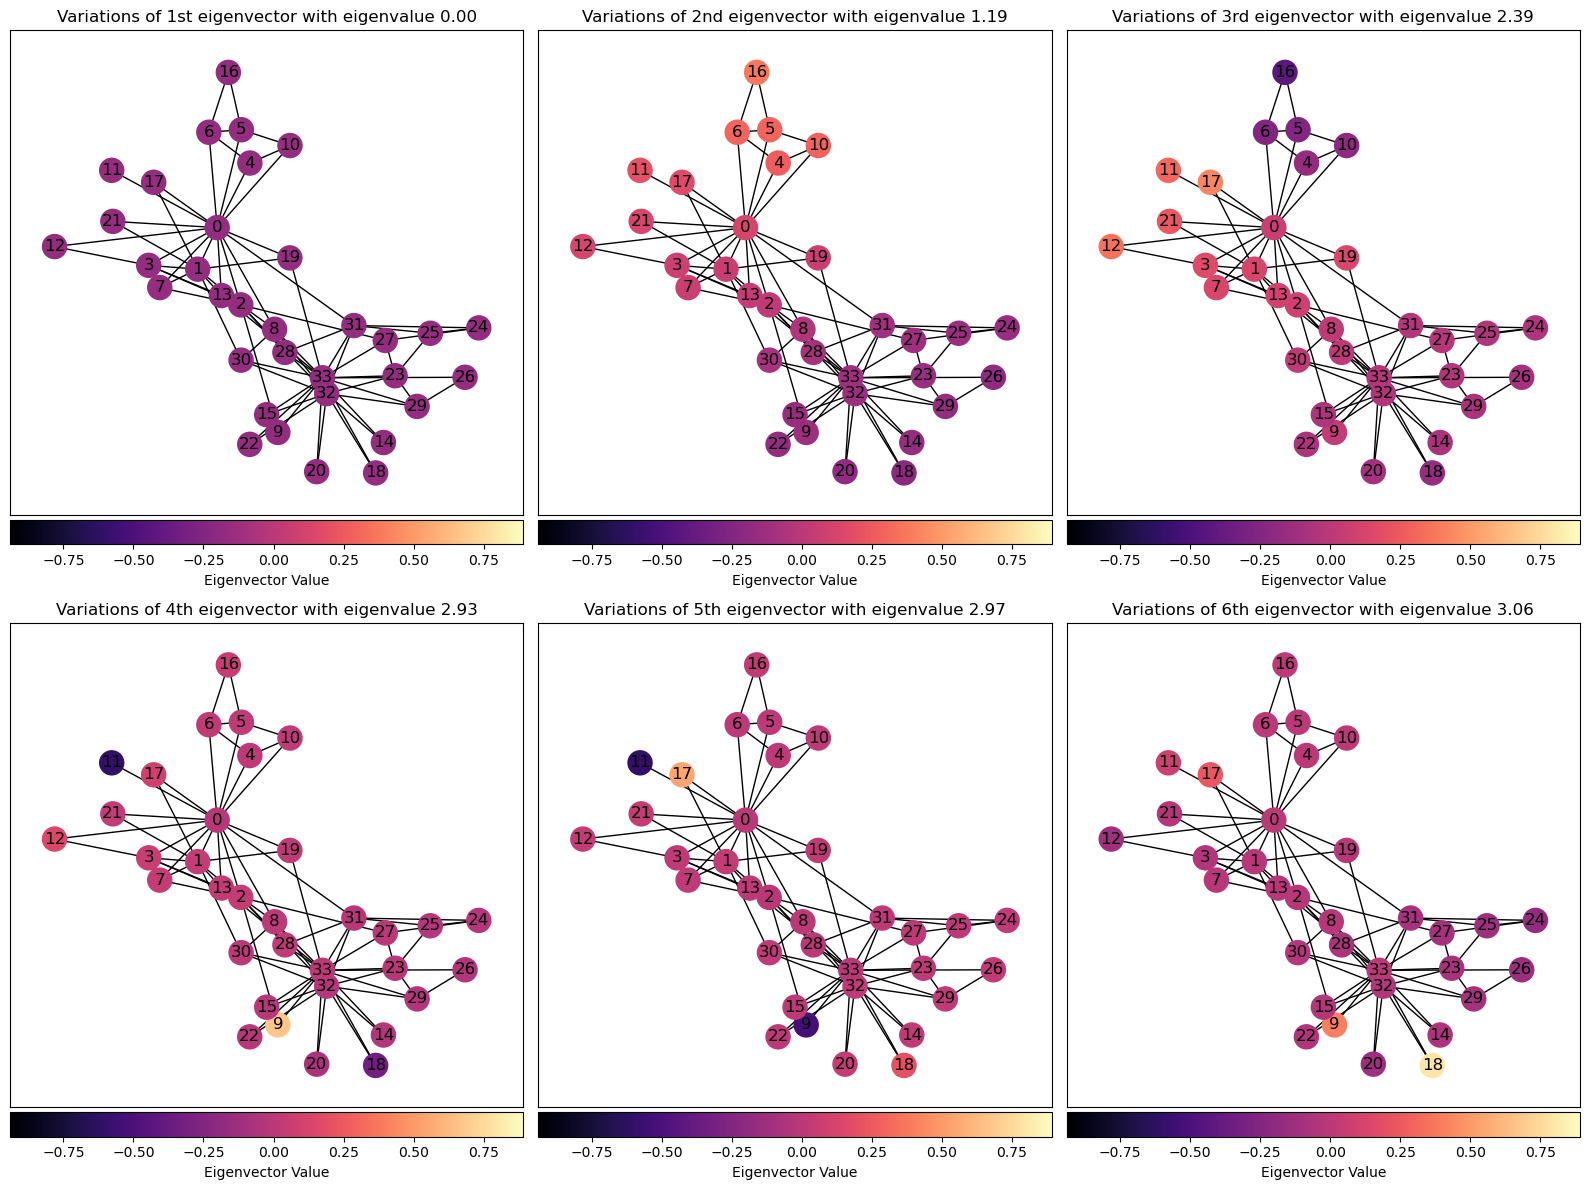

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(42)
cmap = sns.color_palette("magma", as_cmap=True)
layout = nx.spring_layout(G)
idx = 10
vmax = eigenvectors.max()
vmin = eigenvectors.min()

fig, axes = plt.subplots(2, 3, figsize=(16, 12))

for t, ax in enumerate(axes.flat):
    nx.draw_networkx(
        G,
        layout,
        with_labels=True,
        ax=ax,
        node_color=eigenvectors[:, t],
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
    )
    sm = plt.cm.ScalarMappable(
        norm=plt.Normalize(vmin=vmin, vmax=vmax),
        cmap=cmap,
    )
    ax.set_title(
        f"Variations of {int_to_ordinal(t + 1)} eigenvector with eigenvalue {eigenvalues[t]:.2f}"
    )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.05)
    fig.colorbar(sm, cax=cax, label="Eigenvector Value", orientation="horizontal")


fig.tight_layout()
fig.show()